# Stage 1 (EDA, Insight, and Visualization)

Anggota Team 4:
*   Akhmad Yuzfa Salvian Idris
*   Arief Rahman Hakim
*   Bernardus Valentino
*   Milenia Nadia Afifah Puspitasari
*   Sean Frederic Wijaya

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 10, 8
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Data source: https://www.kaggle.com/susant4learning/holiday-package-purchase-prediction

In [3]:
df = pd.read_csv('Travel.csv')
df.sample(5, random_state=100)

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
3476,203476,1,40.0,Company Invited,1,9.0,Salaried,Female,3,5.0,Basic,5.0,Unmarried,4.0,1,3,0,1.0,Executive,22324.0
1011,201011,0,36.0,Self Enquiry,3,9.0,Small Business,Fe Male,2,3.0,Deluxe,4.0,Unmarried,4.0,1,4,0,1.0,Manager,24278.0
159,200159,0,34.0,Company Invited,3,8.0,Small Business,Female,3,3.0,Basic,3.0,Divorced,7.0,0,5,1,2.0,Executive,17231.0
2477,202477,1,40.0,Self Enquiry,3,12.0,Large Business,Male,3,4.0,Deluxe,3.0,Divorced,5.0,0,2,0,2.0,Manager,20764.0
291,200291,0,36.0,Self Enquiry,1,NaN,Large Business,Male,1,3.0,Deluxe,4.0,Single,5.0,0,2,1,0.0,Manager,19485.0


In [4]:
df.columns

Index(['CustomerID', 'ProdTaken', 'Age', 'TypeofContact', 'CityTier',
       'DurationOfPitch', 'Occupation', 'Gender', 'NumberOfPersonVisiting',
       'NumberOfFollowups', 'ProductPitched', 'PreferredPropertyStar',
       'MaritalStatus', 'NumberOfTrips', 'Passport', 'PitchSatisfactionScore',
       'OwnCar', 'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

## Exploratory Data Analysis, Insights, and Data Visualizations

Keterangan Features:

*   customerID = Unique customer ID
*   ProdTaken = The customer taking the package or not (0: No, 1: Yes)
*   Age: Age of customer = Age of customer
*   TypeofContract = How customer was contacted (Company Invited or Self Inquiry)
*   CityTier = City tier depends on the development of a city, population, facilities, and living standards. The categories are ordered i.e.
*   DurationofPitch = Duration of the pitch by a salesperson to the customer
*   Occupation = Occupation of customer
*   Gender = Gender of customer
*   NumberOfPersonVisiting = Total number of persons planning to take the trip with the customer
*   NumberOfFollowups = Total number of follow-ups has been done by the salesperson after the sales pitch
*   ProductPitched = Product pitched by the salesperson
*   PreferredPropertyStar = Preferred hotel property rating by customer
*   MaritalStatus = Marital status of customer
*   NumberOfTrips = Average number of trips in a year by customer
*   Passport = The customer has a passport or not (0: No, 1: Yes)
*   PitchSatisfactionScore = Sales pitch satisfaction score
*   OwnCar = Whether the customers own a car or not (0: No, 1: Yes)
*   NumberOfChildrenVisiting = Total number of children with age less than 5 planning to take the trip with the customer
*   Designation = Designation of the customer in the current organization
*   MonthlyIncome = Gross monthly income of the customer

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

Kita dapat melihat bahwa :

*   Dataframe memiliki total 4888 baris dan 20 kolom
*   Dataframe masih memiliki null values di kolom Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome.

Dari informasi di atas, kita bisa pisahkan kolom kategorical dan numerical sebagai berikut.

In [6]:
cats = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']
nums = ['CustomerID','ProdTaken','Age','CityTier','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','PreferredPropertyStar','NumberOfTrips','Passport','PitchSatisfactionScore','OwnCar','NumberOfChildrenVisiting','MonthlyIncome']

*   Feature-feature yang seharusnya merupakan kategorik: ProdTaken, CityTier, PreferredPropertyStar, Passport, PitchSatisfactionScore, dan OwnCar

In [7]:
df[nums].describe()

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


*   Distribusi nilai di kolom Age, NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome terlihat hampir normal (mean dan median cukup dekat, dan nilai Q2 kira2 tepat di tengah2 Q1 - Q3)
*   Distribusi nilai DurationOfPitch terlihat tidak normal (mean dan median cukup jauh) 

In [8]:
df[cats].describe()

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation
count,4863,4888,4888,4888,4888,4888
unique,2,4,3,5,4,5
top,Self Enquiry,Salaried,Male,Basic,Married,Executive
freq,3444,2368,2916,1842,2340,1842


*   Jumlah unik dari setiap feature cukup sedikit. Ada kemungkinan akan berguna untuk klasifikasi.
*   Feature Gender memiliki jumlah unik 3, sehingga perlu ditinjau lebih lanjut

In [9]:
for col in cats:
    print(f'''Value count kolom {col}:''')
    print(df[col].value_counts())
    print()

Value count kolom TypeofContact:
Self Enquiry       3444
Company Invited    1419
Name: TypeofContact, dtype: int64

Value count kolom Occupation:
Salaried          2368
Small Business    2084
Large Business     434
Free Lancer          2
Name: Occupation, dtype: int64

Value count kolom Gender:
Male       2916
Female     1817
Fe Male     155
Name: Gender, dtype: int64

Value count kolom ProductPitched:
Basic           1842
Deluxe          1732
Standard         742
Super Deluxe     342
King             230
Name: ProductPitched, dtype: int64

Value count kolom MaritalStatus:
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: MaritalStatus, dtype: int64

Value count kolom Designation:
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: Designation, dtype: int64



*   Feature TypeofContact, Gender, dan MaritalStatus didominasi oleh satu value
*   Feature Occupation, ProductPitched, dan Designation didominasi oleh dua values

### PairPlot

<Figure size 1080x1080 with 0 Axes>

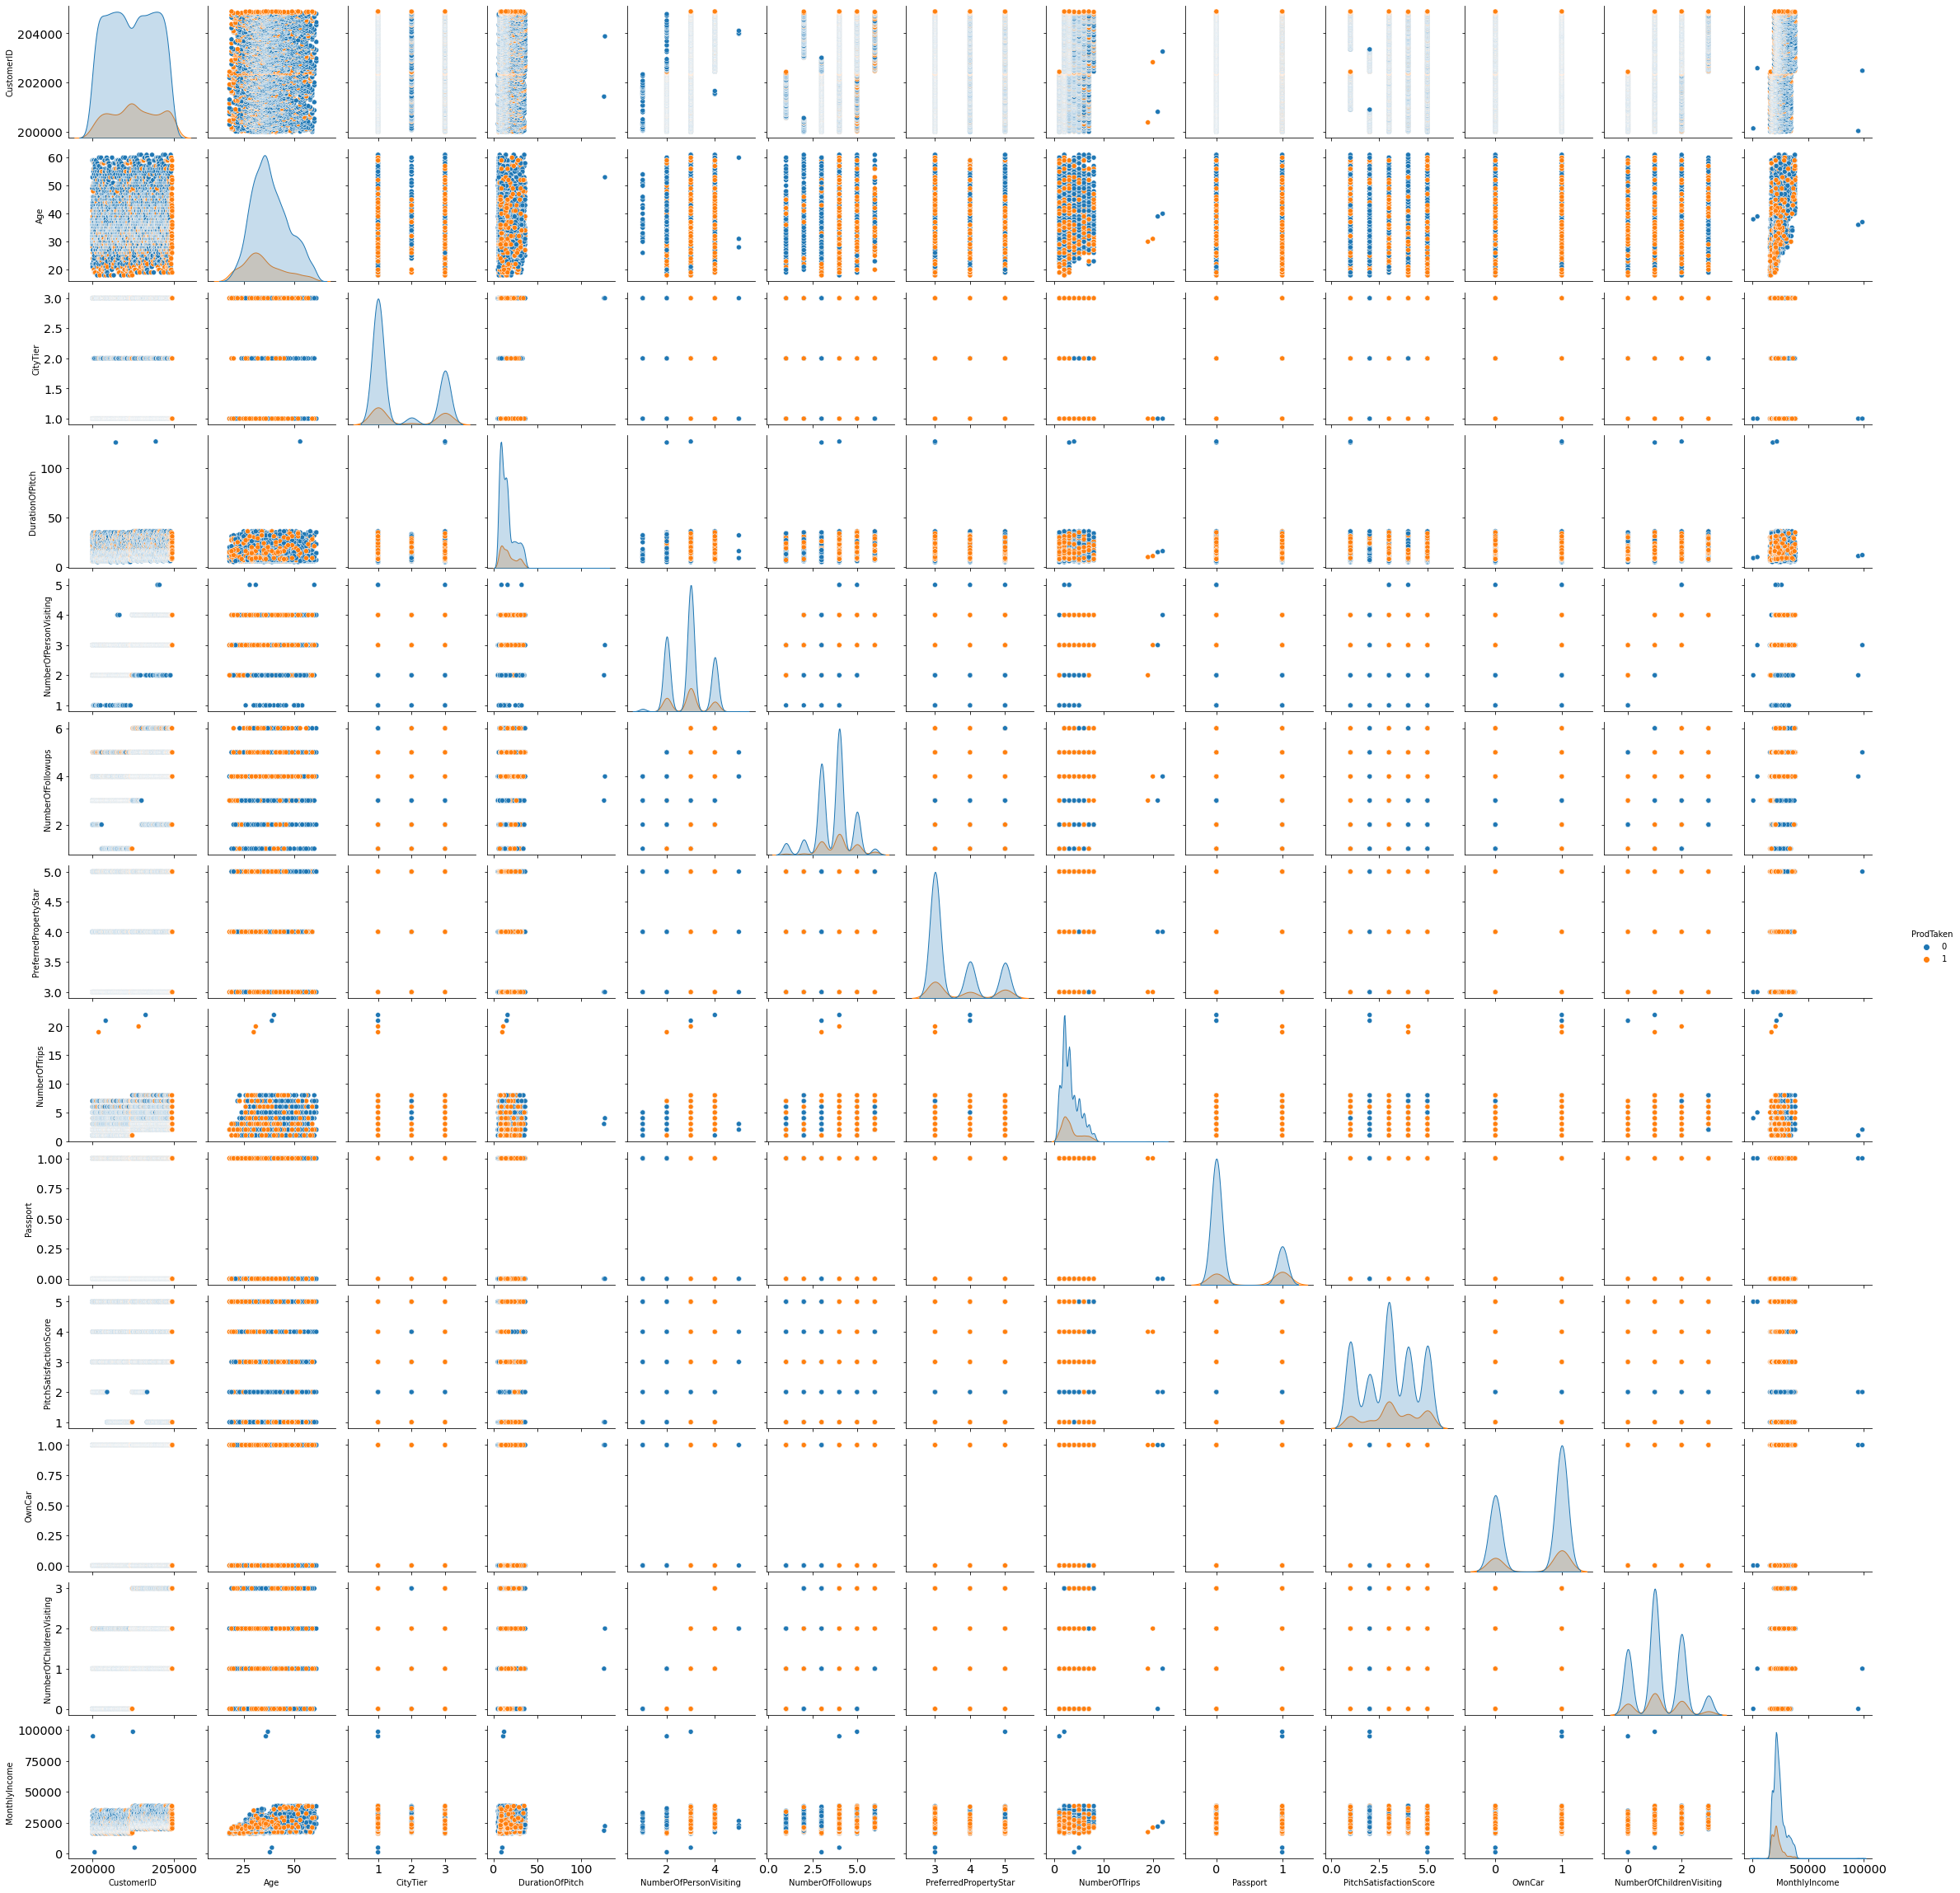

In [10]:
plt.figure(figsize=(15, 15))
sns.pairplot(df, diag_kind='kde', hue='ProdTaken')

### Univariate Analysis (Numerical Variabels)

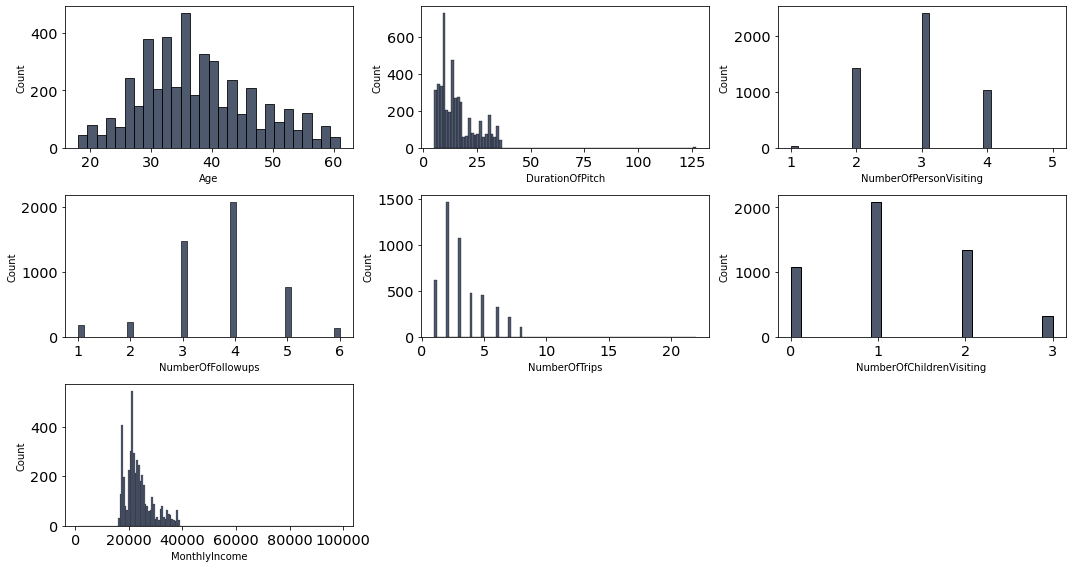

In [11]:
columns = ['Age','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfTrips','NumberOfChildrenVisiting','MonthlyIncome'] 
plt.figure(figsize=(15, 8))
for i in range(0, len(columns)):
    plt.subplot(3 , 3, i+1)
    sns.histplot(df[columns[i]], color='#14213d')
    plt.tight_layout()
plt.show()

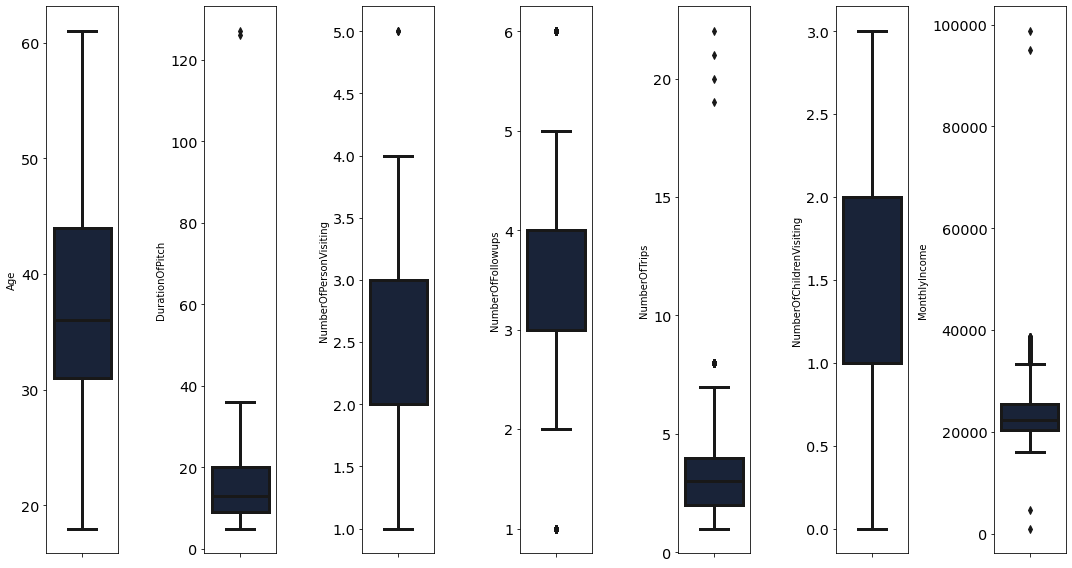

In [12]:
plt.figure(figsize=(15, 8))
for i in range(0, len(columns)):
    plt.subplot(1, len(columns), i+1)
    sns.boxplot(y=df[columns[i]], color='#14213d', orient='v')
    plt.tight_layout()

*   Feature yang tidak memiliki outlier: Age dan NumberOfChildrenVisiting
*   Feature lainnya memiliki outlier
*   Dari boxplot, feature DurationOfPitch, NumberOfTrips, dan MonthlyIncome terlihat right skewed

#### Age

In [13]:
df[['Age']].min()

Age    18.0
dtype: float64

In [14]:
df[['Age']].max()

Age    61.0
dtype: float64

In [15]:
df3 = df.copy()
df3.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [16]:
df3.dropna(inplace=True, subset=['Age'])
df3.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                           0
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               103
dtype: int64

In [17]:
cat = []
for index, column in df3.iterrows():
    if column['Age'] > 15 and column['Age'] <= 20:
        a = '16-20'
    elif column['Age'] > 20 and column['Age'] <= 25:
        a = '21-25'
    elif column['Age'] > 25 and column['Age'] <= 30:
        a = '26-30'
    elif column['Age'] > 30 and column['Age'] <= 35:
        a = '31-35'
    elif column['Age'] > 35 and column['Age'] <= 40:
        a = '36-40'
    elif column['Age'] > 40 and column['Age'] <= 45:
        a = '41-45'
    elif column['Age'] > 45 and column['Age'] <= 50:
        a = '46-50'
    elif column['Age'] > 50 and column['Age'] <= 55:
        a = '51-55'
    elif column['Age'] > 55 and column['Age'] <= 60:
        a = '56-60'
    else:
        a = '61-65'
    cat.append(a)

df3['Age_cat'] = cat
df3

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Age_cat
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,41-45
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,46-50
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,36-40
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,31-35
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,...,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0,31-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,...,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,46-50
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,...,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,26-30
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,...,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,51-55
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,...,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,16-20


In [18]:
AgeCat = df3.groupby(['Age_cat', 'ProdTaken'])['CustomerID'].count().reset_index()
AgeCat['Total'] = AgeCat.groupby(['Age_cat'])['CustomerID'].transform('sum')
AgeCat['Percentage'] = round((AgeCat['CustomerID']/(AgeCat['Total']))*100)
AgeCat

,Age_cat,ProdTaken,CustomerID,Total,Percentage
0,16-20,0,30,84,36.0
1,16-20,1,54,84,64.0
2,21-25,0,174,263,66.0
3,21-25,1,89,263,34.0
4,26-30,0,570,768,74.0
5,26-30,1,198,768,26.0
6,31-35,0,838,1037,81.0
7,31-35,1,199,1037,19.0
8,36-40,0,785,888,88.0
9,36-40,1,103,888,12.0


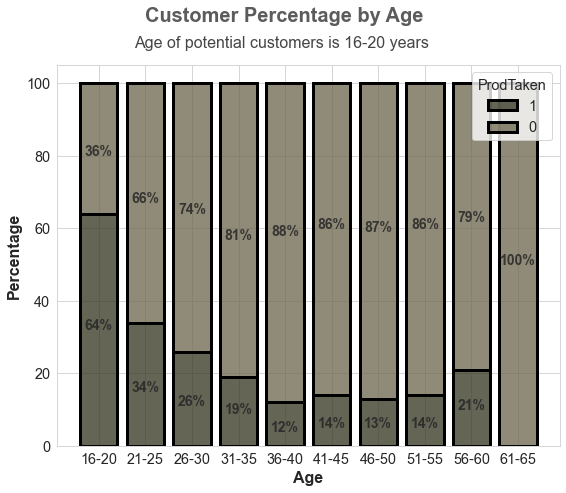

In [19]:
plt.figure(figsize = (9, 7))
sns.set_style('whitegrid')
ax = sns.histplot(
    AgeCat,
    x='Age_cat',
    weights='Percentage',
    hue='ProdTaken',
    multiple='stack',
    palette=['#6B654B','#30321C'],
    edgecolor='black',
    linewidth=3,
    shrink=0.8
)

plt.text(x = 1, y = 117, s = "Customer Percentage by Age",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 0.75, y = 110,
               s = 'Age of potential customers is 16-20 years',
              fontsize = 16, alpha = .85)
plt.text(x = -0.3, y = 32,
               s = '64%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = -0.3, y = 80,
               s = '36%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.7, y = 15,
               s = '34%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.7, y = 67,
               s = '66%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.7, y = 11,
               s = '26%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.7, y = 64,
               s = '74%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.7, y = 57,
               s = '81%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.7, y = 9,
               s = '19%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 3.7, y = 58,
               s = '88%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 3.7, y = 4,
               s = '12%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 4.7, y = 60,
               s = '86%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 4.7, y = 5,
               s = '14%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 5.7, y = 59,
               s = '87%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 5.7, y = 5,
               s = '13%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 6.7, y = 60,
               s = '86%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 6.7, y = 5,
               s = '14%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 7.7, y = 62,
               s = '79%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 7.7, y = 10,
               s = '21%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 8.6, y = 50,
               s = '100%',
              fontsize = 14, weight = 'bold', alpha = .85)

ax.set_ylabel('Percentage',weight = 'bold', fontsize=16)
ax.set_xlabel('Age',weight = 'bold', fontsize=16)
ax.legend(['1', '0'], title='ProdTaken',title_fontsize='x-large',fontsize='x-large')

plt.show()

- Customer dengan umur 16-20 tahun lebih berpotensi untuk mengambil paket

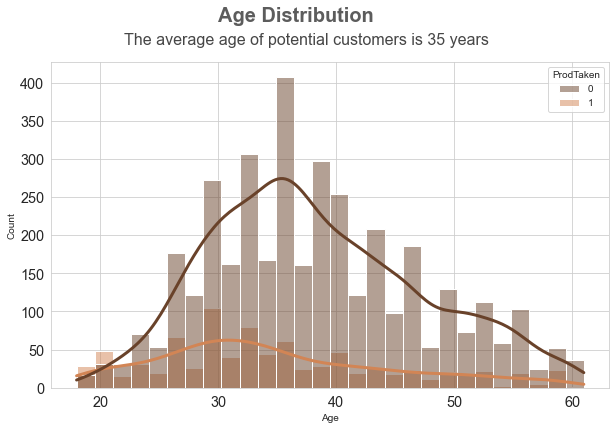

In [20]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.histplot(data=df, x='Age', hue='ProdTaken',palette='copper',  kde = True)

plt.text(x = 30, y = 480, s = "Age Distribution",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 22, y = 450,
               s = 'The average age of potential customers is 35 years',
              fontsize = 16, alpha = .85)
#plt.show()
plt.savefig('AgeDist.png');

In [21]:
df.loc[df['ProdTaken'] == 1]['Age'].mean() 

34.77054794520548

#### Monthly Income

In [22]:
df[['MonthlyIncome']].min()

MonthlyIncome    1000.0
dtype: float64

In [23]:
df[['MonthlyIncome']].max()

MonthlyIncome    98678.0
dtype: float64

In [24]:
df4 = df.copy()
df4.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [25]:
df4.dropna(inplace=True, subset=['MonthlyIncome'])
df4.isna().sum()

CustomerID                    0
ProdTaken                     0
Age                          96
TypeofContact                 0
CityTier                      0
DurationOfPitch             154
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome                 0
dtype: int64

In [26]:
cat = []
for index, column in df4.iterrows():
    if column['MonthlyIncome'] > 0 and column['MonthlyIncome'] <= 10000:
        a = '0-10000'
    elif column['MonthlyIncome'] > 10000 and column['MonthlyIncome'] <= 20000:
        a = '10001-20000'
    elif column['MonthlyIncome'] > 20000 and column['MonthlyIncome'] <= 30000:
        a = '20001-30000'
    elif column['MonthlyIncome'] > 30000 and column['MonthlyIncome'] <= 40000:
        a = '30001-40000'
    elif column['MonthlyIncome'] > 40000 and column['MonthlyIncome'] <= 50000:
        a = '40001-50000'
    elif column['MonthlyIncome'] > 50000 and column['MonthlyIncome'] <= 60000:
        a = '50001-60000'
    elif column['MonthlyIncome'] > 60000 and column['MonthlyIncome'] <= 70000:
        a = '660001-70000'
    elif column['MonthlyIncome'] > 70000 and column['MonthlyIncome'] <= 80000:
        a = '70001-80000'
    elif column['MonthlyIncome'] > 80000 and column['MonthlyIncome'] <= 90000:
        a = '80001-90000'
    else:
        a = '90001-100000'
    cat.append(a)

df4['Income_cat'] = cat
df4

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,...,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,Income_cat
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,...,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0,20001-30000
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,...,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0,20001-30000
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,...,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0,10001-20000
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,...,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0,10001-20000
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,...,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0,10001-20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,...,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0,20001-30000
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,...,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0,20001-30000
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,...,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0,30001-40000
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,...,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0,20001-30000


In [27]:
IncomeCat = df4.groupby(['Income_cat', 'ProdTaken'])['CustomerID'].count().reset_index()
IncomeCat['Total'] = IncomeCat.groupby(['Income_cat'])['CustomerID'].transform('sum')
IncomeCat['Percentage'] = round((IncomeCat['CustomerID']/(IncomeCat['Total']))*100)
IncomeCat

,Income_cat,ProdTaken,CustomerID,Total,Percentage
0,0-10000,0,2,2,100.0
1,10001-20000,0,754,1038,73.0
2,10001-20000,1,284,1038,27.0
3,20001-30000,0,2481,3025,82.0
4,20001-30000,1,544,3025,18.0
5,30001-40000,0,528,588,90.0
6,30001-40000,1,60,588,10.0
7,90001-100000,0,2,2,100.0


In [28]:
IncomeCat.replace(to_replace=r'90001-100000', value='>40000', regex=True, inplace=True)
IncomeCat

,Income_cat,ProdTaken,CustomerID,Total,Percentage
0,0-10000,0,2,2,100.0
1,10001-20000,0,754,1038,73.0
2,10001-20000,1,284,1038,27.0
3,20001-30000,0,2481,3025,82.0
4,20001-30000,1,544,3025,18.0
5,30001-40000,0,528,588,90.0
6,30001-40000,1,60,588,10.0
7,>40000,0,2,2,100.0


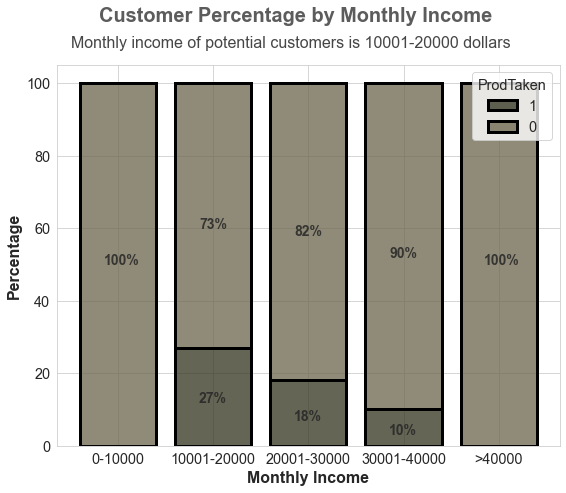

In [29]:
plt.figure(figsize = (9, 7))
sns.set_style('whitegrid')
ax = sns.histplot(
    IncomeCat,
    x='Income_cat',
    weights='Percentage',
    hue='ProdTaken',
    multiple='stack',
    palette=['#6B654B','#30321C'],
    edgecolor='black',
    linewidth=3,
    shrink=0.8
)

plt.text(x = -0.2, y = 117, s = "Customer Percentage by Monthly Income",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.5, y = 110,
               s = 'Monthly income of potential customers is 10001-20000 dollars',
              fontsize = 16, alpha = .85)
plt.text(x = -0.15, y = 50,
               s = '100%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.85, y = 60,
               s = '73%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.85, y = 12,
               s = '27%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.85, y = 58,
               s = '82%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.85, y = 7,
               s = '18%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.85, y = 52,
               s = '90%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.85, y = 3,
               s = '10%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 3.85, y = 50,
               s = '100%',
              fontsize = 14, weight = 'bold', alpha = .85)

ax.set_ylabel('Percentage',weight = 'bold', fontsize=16)
ax.set_xlabel('Monthly Income',weight = 'bold', fontsize=16)
ax.legend(['1', '0'], title='ProdTaken',title_fontsize='x-large',fontsize='x-large')

plt.show()

- Customer dengan monthly income 10001-20000 dolar lebih berpotensi untuk mengambil paket

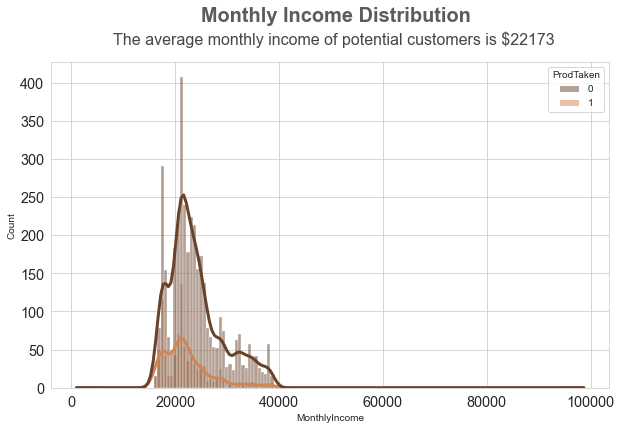

In [30]:
plt.figure(figsize = (10, 6))
sns.set_style('whitegrid')
sns.histplot(data=df, x='MonthlyIncome', hue='ProdTaken',palette='copper',  kde = True)

plt.text(x = 25000, y = 480, s = "Monthly Income Distribution",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = 8000, y = 450,
               s = 'The average monthly income of potential customers is $22173',
              fontsize = 16, alpha = .85)
#plt.show()
plt.savefig('AgeDist.png');

In [31]:
df.loc[df['ProdTaken'] == 1]['MonthlyIncome'].mean() 

22172.827702702703

### Univariate Analysis (Categorical Variabels)

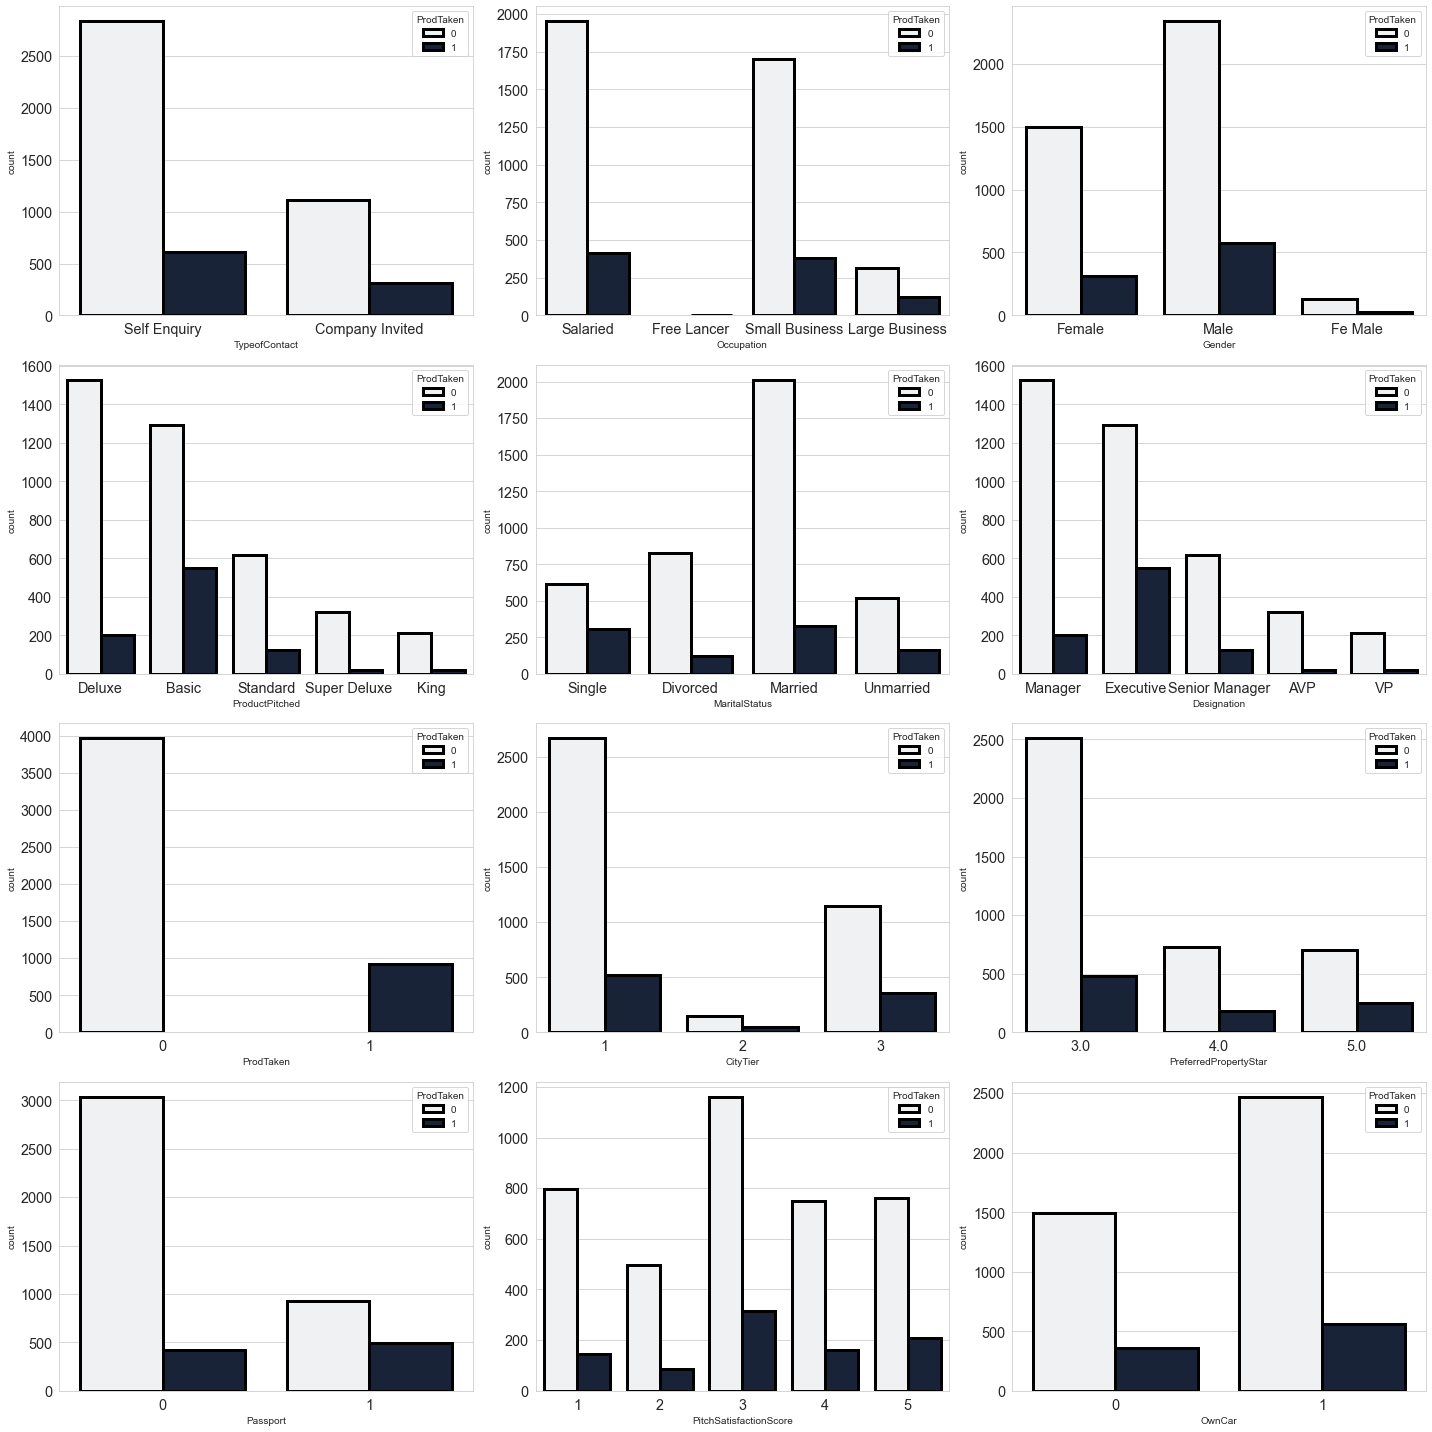

In [32]:
plt.figure(figsize=(20, 20))
column2 = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation','ProdTaken', 'CityTier', 'PreferredPropertyStar', 'Passport', 'PitchSatisfactionScore', 'OwnCar']
for i in range(0, len(column2)):
    plt.subplot(4, 3, i+1)
    sns.countplot(data=df, x=df[column2[i]], hue='ProdTaken', color='#14213d', orient='v',edgecolor='black',linewidth=3)
    plt.tight_layout()

### 1 Feature

#### Gender

Mengubah typo Fe Male menjadi Female

In [33]:
df_gender = df.copy()
Genderlist = []
for index, kolom in df_gender.iterrows():
    if kolom['Gender'] == 'Fe Male':
        x = 'Female'
    elif kolom['Gender'] == 'Female':
        x = 'Female'
    else:
        x = 'Male'
    Genderlist.append(x) 

Genderlist
df_gender['GenderNew'] = Genderlist
df_gender['GenderNew'].unique()

array(['Female', 'Male'], dtype=object)

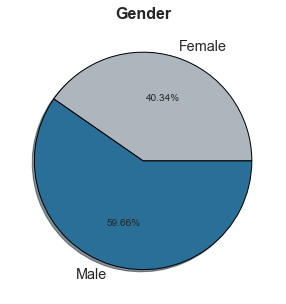

In [34]:
Gender = df_gender.groupby(['GenderNew'])['CustomerID'].count().reset_index()

colors = ['#adb5bd', '#2a6f97']
plt.figure(figsize = (5, 5))
plt.pie(Gender['CustomerID'], labels=Gender['GenderNew'], autopct='%1.2f%%', colors=colors, wedgeprops={'edgecolor': 'black'}, shadow=True)
plt.title('Gender', fontsize = 16, fontweight='bold')

plt.show()

Gender terbanyak Male

In [35]:
Gender = df_gender.groupby(['GenderNew','ProdTaken'])['CustomerID'].count().reset_index()
Gender['Total'] = Gender.groupby(['GenderNew'])['CustomerID'].transform(sum)
Gender['Percentage'] = round((Gender['CustomerID']/(Gender['Total']))*100,2)
Gender['GenderNew'] = Gender['GenderNew'].astype('str')

Gender

,GenderNew,ProdTaken,CustomerID,Total,Percentage
0,Female,0,1630,1972,82.66
1,Female,1,342,1972,17.34
2,Male,0,2338,2916,80.18
3,Male,1,578,2916,19.82


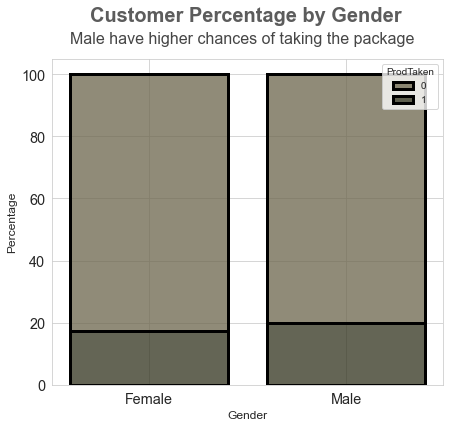

In [36]:
plt.figure(figsize = (7, 6))
sns.set_style('whitegrid')
ax = sns.histplot(
    Gender,
    x='GenderNew',
    weights='Percentage',
    hue='ProdTaken',
    multiple='stack',
    palette=['#6B654B','#30321C'],
    edgecolor='black',
    linewidth=3,
    shrink=0.8
)

plt.text(x = -0.3, y = 117, s = "Customer Percentage by Gender",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.4, y = 110,
               s = 'Male have higher chances of taking the package',
              fontsize = 16, alpha = .85)

ax.set_ylabel('Percentage',fontsize=12)
ax.set_xlabel('Gender',fontsize=12)

plt.show()

Male have higher chances of taking the package

#### City Tier

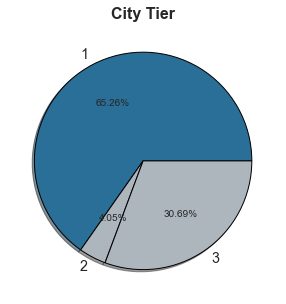

In [37]:
City = df.groupby(['CityTier'])['CustomerID'].count().reset_index()

colors = ['#2a6f97','#adb5bd','#adb5bd']
plt.figure(figsize = (5, 5))
plt.pie(City['CustomerID'], labels=City['CityTier'], autopct='%1.2f%%', colors=colors, wedgeprops={'edgecolor': 'black'}, shadow=True)
plt.title('City Tier', fontsize = 16, fontweight='bold')

plt.show()

City Tier 1 terbanyak

In [38]:
City = df.groupby(['CityTier','ProdTaken'])['CustomerID'].count().reset_index()
City['Total'] = City.groupby(['CityTier'])['CustomerID'].transform(sum)
City['Percentage'] = round((City['CustomerID']/(City['Total']))*100,2)
City['CityTier'] = City['CityTier'].astype('str')
City

,CityTier,ProdTaken,CustomerID,Total,Percentage
0,1,0,2670,3190,83.70
1,1,1,520,3190,16.30
2,2,0,152,198,76.77
3,2,1,46,198,23.23
4,3,0,1146,1500,76.40
5,3,1,354,1500,23.60


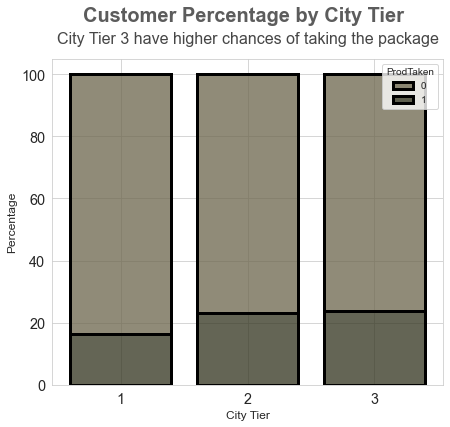

In [39]:
plt.figure(figsize = (7, 6))
sns.set_style('whitegrid')
ax = sns.histplot(
    City,
    x='CityTier',
    weights='Percentage',
    hue='ProdTaken',
    multiple='stack',
    palette=['#6B654B','#30321C'],
    edgecolor='black',
    linewidth=3,
    shrink=0.8
)

plt.text(x = -0.3, y = 117, s = "Customer Percentage by City Tier",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(x = -0.5, y = 110,
               s = 'City Tier 3 have higher chances of taking the package',
              fontsize = 16, alpha = .85)

ax.set_ylabel('Percentage',fontsize=12)
ax.set_xlabel('City Tier',fontsize=12)

plt.show()

City Tier 3 have higher chances of taking the package

#### Marital Status

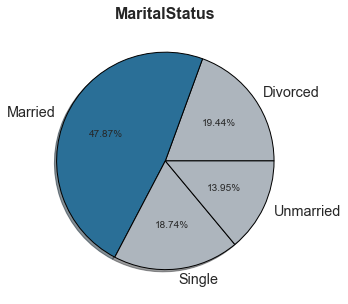

In [40]:
Marital = df.groupby(['MaritalStatus'])['CustomerID'].count().reset_index()

colors = ['#adb5bd','#2a6f97','#adb5bd','#adb5bd']
plt.figure(figsize = (5, 5))
plt.pie(Marital['CustomerID'], labels=Marital['MaritalStatus'], autopct='%1.2f%%', colors=colors, wedgeprops={'edgecolor': 'black'}, shadow=True)
plt.title('MaritalStatus', fontsize = 16, fontweight='bold')

plt.show()

Marital Status terbanyak Married

In [41]:
Marital = df.groupby(['MaritalStatus','ProdTaken'])['CustomerID'].count().reset_index()
Marital['Total'] = Marital.groupby(['MaritalStatus'])['CustomerID'].transform(sum)
Marital['Percentage'] = round((Marital['CustomerID']/(Marital['Total']))*100)
Marital['MaritalStatus'] = Marital['MaritalStatus'].astype('str')
Marital

,MaritalStatus,ProdTaken,CustomerID,Total,Percentage
0,Divorced,0,826,950,87.0
1,Divorced,1,124,950,13.0
2,Married,0,2014,2340,86.0
3,Married,1,326,2340,14.0
4,Single,0,612,916,67.0
5,Single,1,304,916,33.0
6,Unmarried,0,516,682,76.0
7,Unmarried,1,166,682,24.0


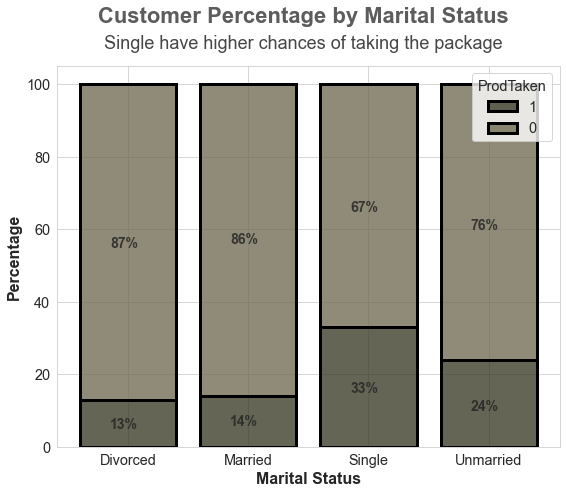

In [42]:
plt.figure(figsize = (9, 7))
sns.set_style('whitegrid')
ax = sns.histplot(
    Marital,
    x='MaritalStatus',
    weights='Percentage',
    hue='ProdTaken',
    multiple='stack',
    palette=['#6B654B','#30321C'],
    edgecolor='black',
    linewidth=3,
    shrink=0.8
)

plt.text(x = -0.25, y = 117, s = "Customer Percentage by Marital Status",
               fontsize = 22, weight = 'bold', alpha = .75)
plt.text(x = -0.2, y = 110,
               s = 'Single have higher chances of taking the package',
              fontsize = 18, alpha = .85)
plt.text(x = -0.15, y = 55,
               s = '87%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = -0.15, y = 5,
               s = '13%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.85, y = 56,
               s = '86%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.85, y = 6,
               s = '14%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.85, y = 65,
               s = '67%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.85, y = 15,
               s = '33%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.85, y = 60,
               s = '76%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.85, y = 10,
               s = '24%',
              fontsize = 14, weight = 'bold', alpha = .85)

ax.set_ylabel('Percentage', weight = 'bold', fontsize=16)
ax.set_xlabel('Marital Status', weight = 'bold', fontsize=16)
ax.legend(['1', '0'], title='ProdTaken',title_fontsize='x-large',fontsize='x-large')

plt.show()

Single have higher chances of taking the package

#### Occupation

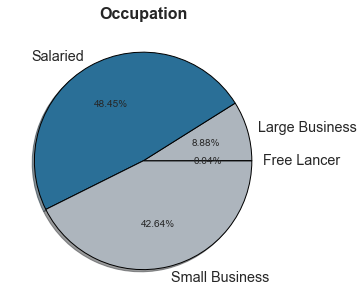

In [43]:
Occupation = df.groupby(['Occupation'])['CustomerID'].count().reset_index()

colors = ['#2a6f97','#adb5bd']
plt.figure(figsize = (5, 5))
plt.pie(Occupation['CustomerID'], labels=Occupation['Occupation'], autopct='%1.2f%%', colors=colors, wedgeprops={'edgecolor': 'black'}, shadow=True)
plt.title('Occupation', fontsize = 16, fontweight='bold')

plt.show()

Occupation terbanyak Salaried

In [44]:
Occup = df.groupby(['Occupation','ProdTaken'])['CustomerID'].count().reset_index()
Occup['Total'] = Occup.groupby(['Occupation'])['CustomerID'].transform(sum)
Occup['Percentage'] = round((Occup['CustomerID']/(Occup['Total']))*100)
Occup['Occupation'] = Occup['Occupation'].astype('str')

Occup0 = pd.DataFrame([['Free Lancer', 0, 0, 0, 0.00]],
                   columns=['Occupation', 'ProdTaken','CustomerID','Total','Percentage'])
Occup = pd.concat([Occup, Occup0])
Occup

,Occupation,ProdTaken,CustomerID,Total,Percentage
0,Free Lancer,1,2,2,100.0
1,Large Business,0,314,434,72.0
2,Large Business,1,120,434,28.0
3,Salaried,0,1954,2368,83.0
4,Salaried,1,414,2368,17.0
5,Small Business,0,1700,2084,82.0
6,Small Business,1,384,2084,18.0
0,Free Lancer,0,0,0,0.0


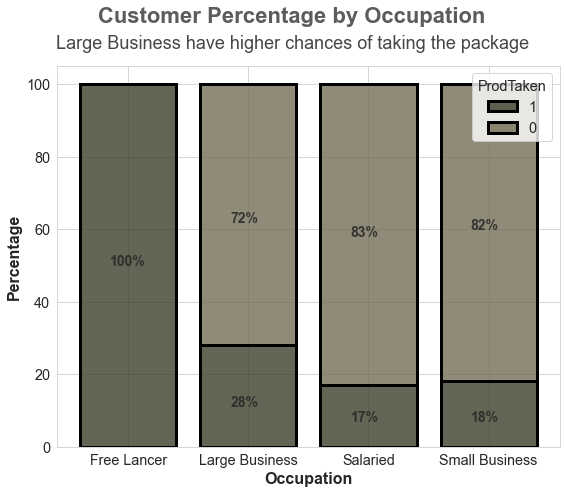

In [45]:
plt.figure(figsize = (9, 7))
sns.set_style('whitegrid')
ax = sns.histplot(
    Occup,
    x='Occupation',
    weights='Percentage',
    hue='ProdTaken',
    multiple='stack',
    palette=['#6B654B','#30321C'],
    edgecolor='black',
    linewidth=3,
    shrink=0.8
)

plt.text(x = -0.25, y = 117, s = "Customer Percentage by Occupation",
               fontsize = 22, weight = 'bold', alpha = .75)
plt.text(x = -0.6, y = 110,
               s = 'Large Business have higher chances of taking the package',
              fontsize = 18, alpha = .85)
plt.text(x = -0.15, y = 50,
               s = '100%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.85, y = 62,
               s = '72%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.85, y = 11,
               s = '28%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.85, y = 58,
               s = '83%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.85, y = 7,
               s = '17%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.85, y = 60,
               s = '82%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.85, y = 7,
               s = '18%',
              fontsize = 14, weight = 'bold', alpha = .85)

ax.set_ylabel('Percentage', weight = 'bold', fontsize=16)
ax.set_xlabel('Occupation', weight = 'bold', fontsize=16)
ax.legend(['1', '0'], title='ProdTaken',title_fontsize='x-large',fontsize='x-large')

plt.show()

Large Business have higher chances of taking the package

#### Designation

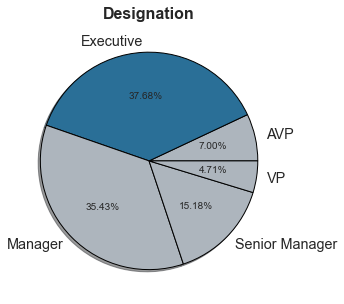

In [46]:
Designation = df.groupby(['Designation'])['CustomerID'].count().reset_index()
colors = ['#adb5bd','#2a6f97','#adb5bd','#adb5bd','#adb5bd']
plt.figure(figsize = (5, 5))
plt.pie(Designation['CustomerID'],
        labels=Designation['Designation'],
        autopct='%1.2f%%',
        colors = colors,
        wedgeprops={'edgecolor': 'black'},
        shadow=True)
plt.title('Designation', fontsize = 16, fontweight='bold')

plt.show()

Designation terbanyak Executive

In [47]:
Des = df.groupby(['Designation','ProdTaken'])['CustomerID'].count().reset_index()
Des['Total'] = Des.groupby(['Designation'])['CustomerID'].transform(sum)
Des['Percentage'] = round((Des['CustomerID']/(Des['Total']))*100)
Des['Designation'] = Des['Designation'].astype('str')
Des

,Designation,ProdTaken,CustomerID,Total,Percentage
0,AVP,0,322,342,94.0
1,AVP,1,20,342,6.0
2,Executive,0,1290,1842,70.0
3,Executive,1,552,1842,30.0
4,Manager,0,1528,1732,88.0
5,Manager,1,204,1732,12.0
6,Senior Manager,0,618,742,83.0
7,Senior Manager,1,124,742,17.0
8,VP,0,210,230,91.0
9,VP,1,20,230,9.0


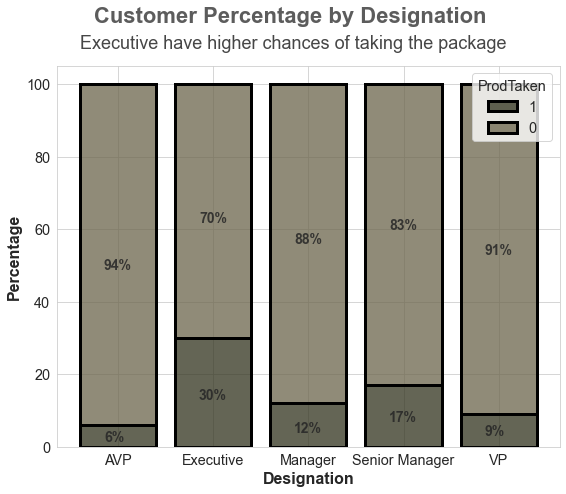

In [48]:
plt.figure(figsize = (9, 7))
sns.set_style('whitegrid')
ax = sns.histplot(
    Des,
    x='Designation',
    weights='Percentage',
    hue='ProdTaken',
    multiple='stack',
    palette=['#6B654B','#30321C'],
    edgecolor='black',
    linewidth=3,
    shrink=0.8
)

plt.text(x = -0.25, y = 117, s = "Customer Percentage by Designation",
               fontsize = 22, weight = 'bold', alpha = .75)
plt.text(x = -0.4, y = 110,
               s = 'Executive have higher chances of taking the package',
              fontsize = 18, alpha = .85)
plt.text(x = -0.15, y = 49,
               s = '94%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = -0.15, y = 1.5,
               s = '6%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.85, y = 62,
               s = '70%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 0.85, y = 13,
               s = '30%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.85, y = 56,
               s = '88%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 1.85, y = 4,
               s = '12%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.85, y = 60,
               s = '83%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 2.85, y = 7,
               s = '17%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 3.85, y = 53,
               s = '91%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(x = 3.85, y = 3,
               s = '9%',
              fontsize = 14, weight = 'bold', alpha = .85)

ax.set_ylabel('Percentage', weight = 'bold', fontsize=16)
ax.set_xlabel('Designation', weight = 'bold', fontsize=16)
ax.legend(['1', '0'], title='ProdTaken',title_fontsize='x-large',fontsize='x-large')

plt.show()

Executive have higher chances of taking the package

### 2 Feature

#### Product Pitched vs Designation

In [49]:
df2 = df.groupby(['Designation','ProductPitched','ProdTaken'])['CustomerID'].count().reset_index()
df2 = df2.sort_values(['Designation'],ascending=False)
df2

,Designation,ProductPitched,ProdTaken,CustomerID
8,VP,King,0,210
9,VP,King,1,20
6,Senior Manager,Standard,0,618
7,Senior Manager,Standard,1,124
4,Manager,Deluxe,0,1528
5,Manager,Deluxe,1,204
2,Executive,Basic,0,1290
3,Executive,Basic,1,552
0,AVP,Super Deluxe,0,322
1,AVP,Super Deluxe,1,20


In [50]:
df2['Total'] = df2.groupby(['Designation'])['CustomerID'].transform(sum)
df2['Percentage'] = round((df2['CustomerID']/(df2['Total']))*100)
df2 = df2.reset_index(drop=True)
df2 = df2.sort_values(['Total'],ascending=False)
df2

,Designation,ProductPitched,ProdTaken,CustomerID,Total,Percentage
6,Executive,Basic,0,1290,1842,70.0
7,Executive,Basic,1,552,1842,30.0
4,Manager,Deluxe,0,1528,1732,88.0
5,Manager,Deluxe,1,204,1732,12.0
2,Senior Manager,Standard,0,618,742,83.0
3,Senior Manager,Standard,1,124,742,17.0
8,AVP,Super Deluxe,0,322,342,94.0
9,AVP,Super Deluxe,1,20,342,6.0
0,VP,King,0,210,230,91.0
1,VP,King,1,20,230,9.0


In [51]:
df2 = df2.assign(Notes = df2['Designation']+ '-' + df2['ProductPitched'])
df2

,Designation,ProductPitched,ProdTaken,CustomerID,Total,Percentage,Notes
6,Executive,Basic,0,1290,1842,70.0,Executive-Basic
7,Executive,Basic,1,552,1842,30.0,Executive-Basic
4,Manager,Deluxe,0,1528,1732,88.0,Manager-Deluxe
5,Manager,Deluxe,1,204,1732,12.0,Manager-Deluxe
2,Senior Manager,Standard,0,618,742,83.0,Senior Manager-Standard
3,Senior Manager,Standard,1,124,742,17.0,Senior Manager-Standard
8,AVP,Super Deluxe,0,322,342,94.0,AVP-Super Deluxe
9,AVP,Super Deluxe,1,20,342,6.0,AVP-Super Deluxe
0,VP,King,0,210,230,91.0,VP-King
1,VP,King,1,20,230,9.0,VP-King


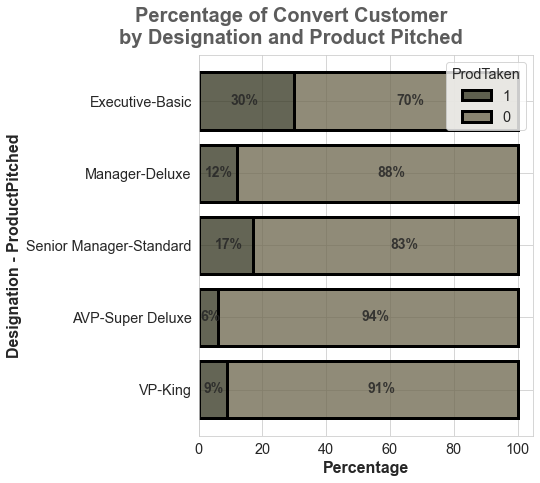

In [52]:
plt.figure(figsize = (6,7))
sns.set_style('whitegrid')
ax = sns.histplot(
    df2,
    y='Notes',
    weights='Percentage',
    hue='ProdTaken',
    multiple='stack',
    palette=['#6B654B','#30321C'],
    edgecolor='black',
    linewidth=3,
    shrink=0.8
)

plt.text(y = -1.1, x = -20, s = "Percentage of Convert Customer",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(y = -0.8, x = -25, s = "by Designation and Product Pitched",
               fontsize = 20, weight = 'bold', alpha = .75)

plt.text(y = 0.05, x = 62,
               s = '70%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 0.05, x = 10,
               s = '30%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 1.05, x = 56,
               s = '88%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 1.05, x = 2,
               s = '12%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 2.05, x = 60,
               s = '83%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 2.05, x = 5,
               s = '17%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 3.05, x = 51,
               s = '94%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 3.05, x = 0.5,
               s = '6%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 4.05, x = 53,
               s = '91%',
              fontsize = 14, weight = 'bold', alpha = .85)
plt.text(y = 4.05, x = 1.5,
               s = '9%',
              fontsize = 14, weight = 'bold', alpha = .85)

ax.set_ylabel('Designation - ProductPitched', weight = 'bold', fontsize=16)
ax.set_xlabel('Percentage', weight = 'bold', fontsize=16)
ax.legend(['1', '0'], title='ProdTaken',title_fontsize='x-large',fontsize='x-large')

plt.show()

In [53]:
df3 = df.groupby(['Designation','ProductPitched'])['CustomerID'].count().reset_index()
df3 = df3.sort_values(['CustomerID'],ascending=False)
df3

,Designation,ProductPitched,CustomerID
1,Executive,Basic,1842
2,Manager,Deluxe,1732
3,Senior Manager,Standard,742
0,AVP,Super Deluxe,342
4,VP,King,230


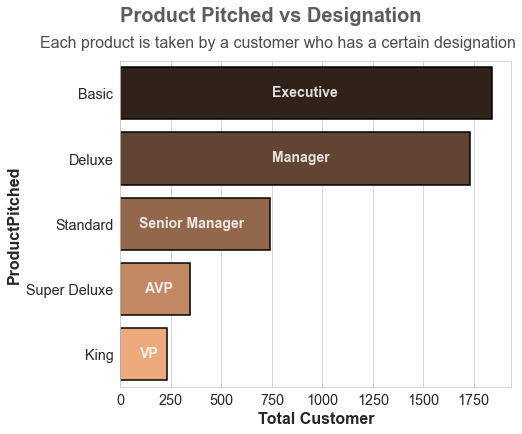

In [54]:
plt.figure(figsize = (7, 6))
sns.set_style('whitegrid')
sns.barplot(data=df3, y='ProductPitched',x='CustomerID', palette='copper', edgecolor="black", linewidth ='1.5', orient='h', ci=None)

plt.text(y = -1.1, x = -0.9, s = "Product Pitched vs Designation",
               fontsize = 20, weight = 'bold', alpha = .75)
plt.text(y = -0.7, x =-400,
               s = 'Each product is taken by a customer who has a certain designation',
              fontsize = 16, alpha = .815)
plt.text(y = 0.05, x = 750,
               s = 'Executive',
              fontsize = 14, color='white', weight = 'bold', alpha = .85, rotation = 'horizontal')
plt.text(y = 1.05, x = 750,
               s = 'Manager',
              fontsize = 14, color='white', weight = 'bold', alpha = .85, rotation = 'horizontal')
plt.text(y = 2.05, x = 90,
               s = 'Senior Manager',
              fontsize = 14, color='white', weight = 'bold', alpha = .85, rotation = 'horizontal')
plt.text(y = 3.05, x = 120,
               s = 'AVP',
              fontsize = 14, color='white', weight = 'bold', alpha = .85, rotation = 'horizontal')
plt.text(y = 4.05, x = 90,
               s = 'VP',
              fontsize = 14, color='white', weight = 'bold', alpha = .85, rotation = 'horizontal')

plt.xlabel('Total Customer',weight = 'bold', fontsize=16)
plt.ylabel('ProductPitched',weight = 'bold', fontsize=16)

plt.show()

- Setiap product dipitch pada customer dengan designation tertentu

### Bivariate Analysis

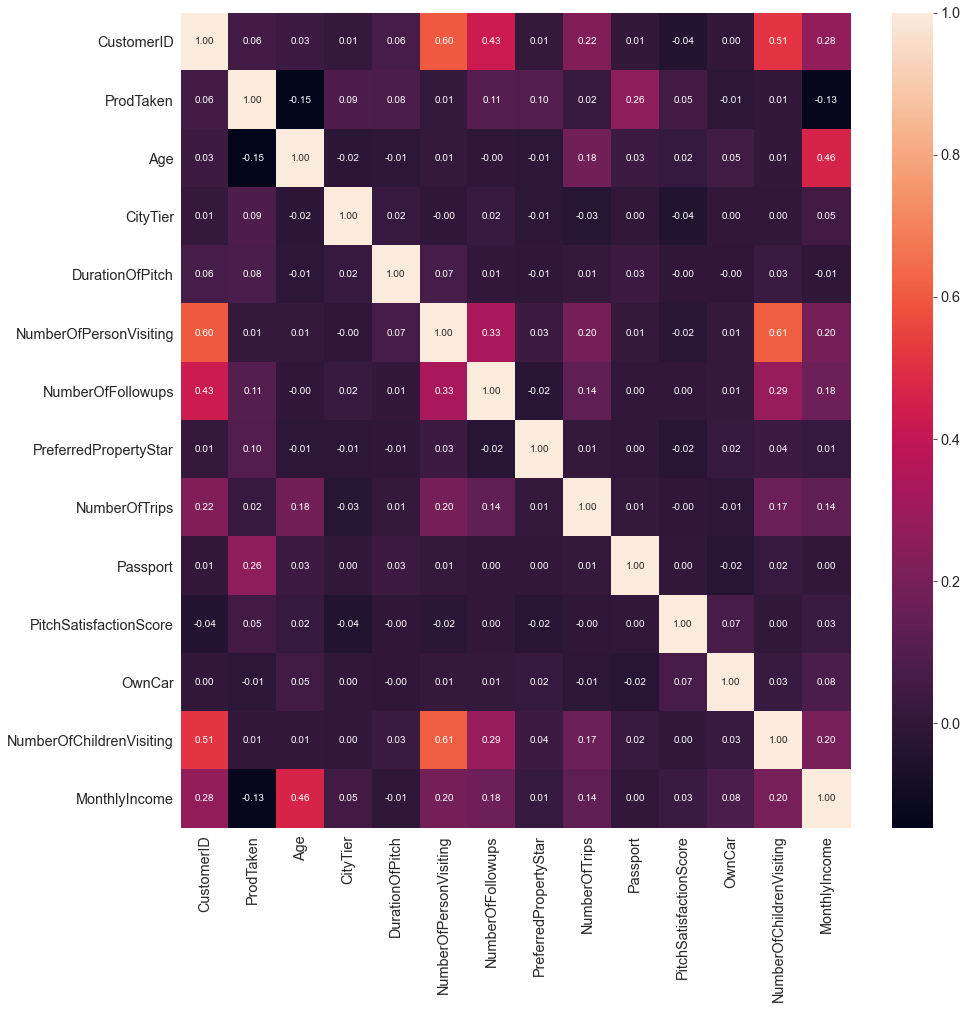

In [55]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='rocket', annot=True, fmt='.2f')
plt.savefig('Heatmap.png');

Dari correlation heatmap di atas dapat dilihat bahwa:

*   Seluruh feature memiliki korelasi lemah dengan target
*   Top 3 feature yang berkorelasi kuat dengan target: Passport, Age, dan MonthlyIncome
*   Feature OwnCar, NumberOfChildrenVisiting, dan NumberOfPersonVisiting, memiliki korelasi yang paling lemah dengan target sehingga mungkin nantinya fitur-fitur ini dapat diabaikan
*   Feature yang saling berkorelasi kuat/redundan (>0.3): NumberOfPersonVisiting dengan NumberOfChildrenVisiting, NumberOfPersonVisiting dengan NumberOfFollowups, dan Age dengan MonthlyIncome. Nantinya salah satu dari variabel yang berkorelasi akan didrop (akan dilihat dari nilai VIF (Variance Inflation Factor) nya).

Kemungkinan feature yang didrop: OwnCar, NumberOfChildrenVisiting, NumberOfPersonVisiting, dan MonthlyIncome

### EDA Conclusions

*   Terdapat missing values, yakni kolom Age, TypeofContact, DurationOfPitch, NumberOfFollowups, PreferredPropertyStar, NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome sehingga harus diurus ketika preprocessing
*  Feature-feature yang seharusnya merupakan kategorik yakni ProdTaken, CityTier, PreferredPropertyStar, Passport, PitchSatisfactionScore, dan OwnCar sehingga harus diubah saat preprocessing
*   Distribusi nilai di kolom Age, NumberOfPersonVisiting, NumberOfFollowups, NumberOfTrips, NumberOfChildrenVisiting, dan MonthlyIncome terlihat hampir normal sedangkan dari boxplot dan histplot, feature DurationOfPitch, NumberOfTrips, dan MonthlyIncome terlihat right skewed sehingga harus distandardisasi saat preprocessing
*   Jumlah unik dari setiap feature cukup sedikit. Ada kemungkinan akan berguna untuk klasifikasi
*   Feature Gender memiliki jumlah unik 3, sehingga perlu ditinjau lebih lanjut
*   Feature yang tidak memiliki outlier yakni Age dan NumberOfChildrenVisiting, lainnya memiliki outlier
*   Seluruh feature memiliki korelasi lemah dengan target
*   Top 3 feature yang berkorelasi kuat dengan target: Passport, Age, dan MonthlyIncome
*   Feature OwnCar, NumberOfChildrenVisiting, dan NumberOfPersonVisiting, memiliki korelasi yang paling lemah dengan target sehingga mungkin nantinya fitur-fitur ini dapat diabaikan
*   Feature yang saling berkorelasi kuat/redundan (>0.3): NumberOfPersonVisiting dengan NumberOfChildrenVisiting, NumberOfPersonVisiting dengan NumberOfFollowups, dan Age dengan MonthlyIncome. Nantinya salah satu dari variabel yang berkorelasi akan didrop (akan dilihat dari nilai VIF (Variance Inflation Factor) nya).
*   Kemungkinan feature yang didrop: OwnCar, NumberOfChildrenVisiting, NumberOfPersonVisiting, dan MonthlyIncome

### Business Insight Conclusion

* Customer dengan monthly income 10001-20000 dolar lebih berpotensi untuk mengambil paket
* Customer dengan umur 16-20 tahun lebih berpotensi untuk mengambil paket
* Customer terbanyak :
    - Gender : Male
    - City : Tier 1
    - Marital Status : Married
    - Occupation : Salaried
    - Designation : Executive
* Customer potensial :
    - Gender : Male
    - City : Tier 3
    - Marital Status : Single
    - Occupation : Large Business
    - Designation : Executive